In [1]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import panel as pn
import plotly.express as px
import numpy as np
from hvplot import hvPlot
import param
from src.data.make_dataset import DATA_PATH
from src.visualization.visualize import _get_upper_bar, PLOT_OPTS
from src.visualization.panel_figures import benchmark

pd.options.plotting.backend = "holoviews"

%load_ext autoreload
%autoreload 2

In [2]:
df = benchmark.get_df()

In [3]:
df.columns

Index(['Id', 'SIREN principal', 'Méthode BEGES (V4,V5)', 'Type de structure',
       'Type de collectivité', 'Mode de consolidation', 'Recalcul',
       'Comparaison avec le précédent bilan', 'nb_salaries_range',
       'nb_salaries_min', 'nb_salaries_max', 'nb_salaries_mean', 'naf5',
       'Secteur d'activité (NAF1)', 'naf2', 'naf3', 'naf4',
       'month_publication', 'Année de reporting', 'poste_emissions',
       'Émissions_totales', 'Émission_par_salarié', 'emissions_clipped',
       'Catégorie d'émissions', 'Poste d'émissions'],
      dtype='object')

## 01 - scope 3 study


TODO
* add y axis option: sub_poste_name, secteur, type structure
* add/fix x axis option: /salarie or total

In [5]:
benchmark.get_benchmark_dashboard()

Row
    [0] WidgetBox(margin=10)
        [0] Select(name='Indicateur', options=['Émission_par_salarié', ...], value='Émission_par_salarié')
        [1] Select(name='Group by', options=["Poste d'émissions", ...], value="Poste d'émissions")
        [2] Param(MultiChoiceWithAll, name='Type de structure', widgets={'selected_options': <...})
        [3] Param(MultiChoiceWithAll, name="Secteur d'activité (..., widgets={'selected_options': <...})
        [4] Param(MultiChoiceWithAll, name="Catégorie d'émissions", widgets={'selected_options': <...})
        [5] Param(MultiChoiceWithAll, name="Poste d'émissions", widgets={'selected_options': <...})
        [6] Param(MultiChoiceWithAll, name='Année de reporting', widgets={'selected_options': <...})
        [7] Param(MultiChoiceWithAll, name='Mode de consolidation', widgets={'selected_options': <...})
    [1] Column
        [0] ParamFunction(function, _pane=Markdown, defer_load=False)
        [1] ParamFunction(function, _pane=HoloViews, defer_load=False)
        [2] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [6]:
df.columns

Index(['Id', 'SIREN principal', 'Méthode BEGES (V4,V5)', 'Type de structure',
       'Type de collectivité', 'Mode de consolidation', 'Recalcul',
       'Comparaison avec le précédent bilan', 'nb_salaries_range',
       'nb_salaries_min', 'nb_salaries_max', 'nb_salaries_mean', 'naf5',
       'Secteur d'activité (NAF1)', 'naf2', 'naf3', 'naf4',
       'month_publication', 'Année de reporting', 'poste_emissions',
       'Émissions_totales', 'Émission_par_salarié', 'emissions_clipped',
       'Catégorie d'émissions', 'Poste d'émissions'],
      dtype='object')

## Remove missing values

This includes nans and zeros

N_BILANS_TOTAL = 5639

In [7]:
zeros = df.groupby('sub_poste_name').agg({'emissions_par_salarie': lambda x: x.eq(0).sum()})
nans = df.groupby('sub_poste_name').agg({'emissions_par_salarie': lambda x: x.isna().sum()})
non_zeros = df.groupby('sub_poste_name').agg({'emissions_par_salarie': lambda x: (x.gt(0) | x.lt(0)).sum()})
total = df.fillna(0).groupby('sub_poste_name')['emissions_par_salarie'].count()

KeyError: 'sub_poste_name'

In [ ]:
total

In [67]:
zeros + non_zeros + nans

,emissions_par_salarie
sub_poste_name,
1.1 - Émissions directes des sources fixes de combustion,5639
1.2 - Émissions directes des sources mobiles de combustion,5639
1.3 - Émissions directes des procédés hors énergie,5639
1.4 - Émissions directes fugitives,5639
1.5 - Émissions issues de la biommasse (sols et forêts),5639
2.1 - Émissions indirectes liées à la consommation d'électricité,5639
2.2 - Émissions indirectes liées à la consommation d'énergie autre que l'électricité,5639
3.1 - Transport de marchandise amont,5639
3.2 - Transport de marchandise aval,5639


In [84]:
x = pd.concat([nans, zeros, non_zeros], axis=1)
x.columns = ['nans', 'zeros', 'non_zeros']
x.plot(kind='bar', stacked=True, invert=True).opts(width=1200)

:Bars   [sub_poste_name,Variable]   (value)

In [68]:
len(df[df.emissions < 0])

4

In [59]:
df[~df.emissions_par_salarie.eq(0) & ~df.emissions_par_salarie.isna() & ~df.emissions_par_salarie.gt(0)]

,Id,SIREN principal,"Méthode BEGES (V4,V5)",Type de structure,Type de collectivité,Mode de consolidation,Recalcul,Comparaison avec le précédent bilan,nb_salaries_range,nb_salaries_min,...,naf3,naf4,month_publication,Année de reporting,poste_emissions,emissions,emissions_par_salarie,emissions_clipped,poste_name,sub_poste_name
79328,93763bdb-b1cd-11ed-8fce-005056b7acd1,563820489,v4,Entreprise,NaN,Opérationnel,NaN,NaN,500-999,500.0,...,Autres commerces de gros spécialisés,Commerce de gros de quincaillerie et fournitur...,2016-06,2015,4.3,-8.1,-0.010807,1.0,4 - Produits achetés,4.3 - Gestion des déchets
95919,9370e673-b1cd-11ed-8fce-005056b7acd1,229740014,v4,Collectivité territoriale (dont EPCI),Départements,Opérationnel,NaN,NaN,5000-9999,5000.0,...,NaN,NaN,2015-05,2011,5.1,-681.0,-0.090806,1.0,5 - Produits vendus,5.1 - Utilisation des produits vendus
107175,9370c4e3-b1cd-11ed-8fce-005056b7acd1,200043008,v4,Collectivité territoriale (dont EPCI),Communauté d'agglomération,Opérationnel,NaN,NaN,100-199,100.0,...,NaN,NaN,2015-03,2012,5.3,-270.0,-1.806020,1.0,5 - Produits vendus,5.3 - Fin de vie des produits vendus
118767,93764dbf-b1cd-11ed-8fce-005056b7acd1,712620715,v4,Entreprise,NaN,Opérationnel,ANNEE DE REPORTING ET ANNEE DE REFERENCE\n\n \...,NaN,500-999,500.0,...,Collecte des déchets,Collecte des déchets non dangereux,2016-05,2014,6.1,-69068.0,-92.152101,1.0,6 - Autres émissions indirectes,6.1 - Autres émissions directes


## Mapping

* Scope 1: 1.1, ..., 1.5
* Scope 2: 2.1, 2.2
* Scope 3: 3+

Conversion v4 -> v5:

* P8 "Émissions liées a l'énergie non incluses dans scope 1 / 2" -> 4.1 "Achats de biens"
* P9 "Achats produits ou services" -> arbitrage, 4.1 "Achats de biens"
* P20 "Franchise aval" -> arbitrage, 6.1 "Autres émissions indirectes"

([source](https://bilans-ges.ademe.fr/bilans/comment-publier))

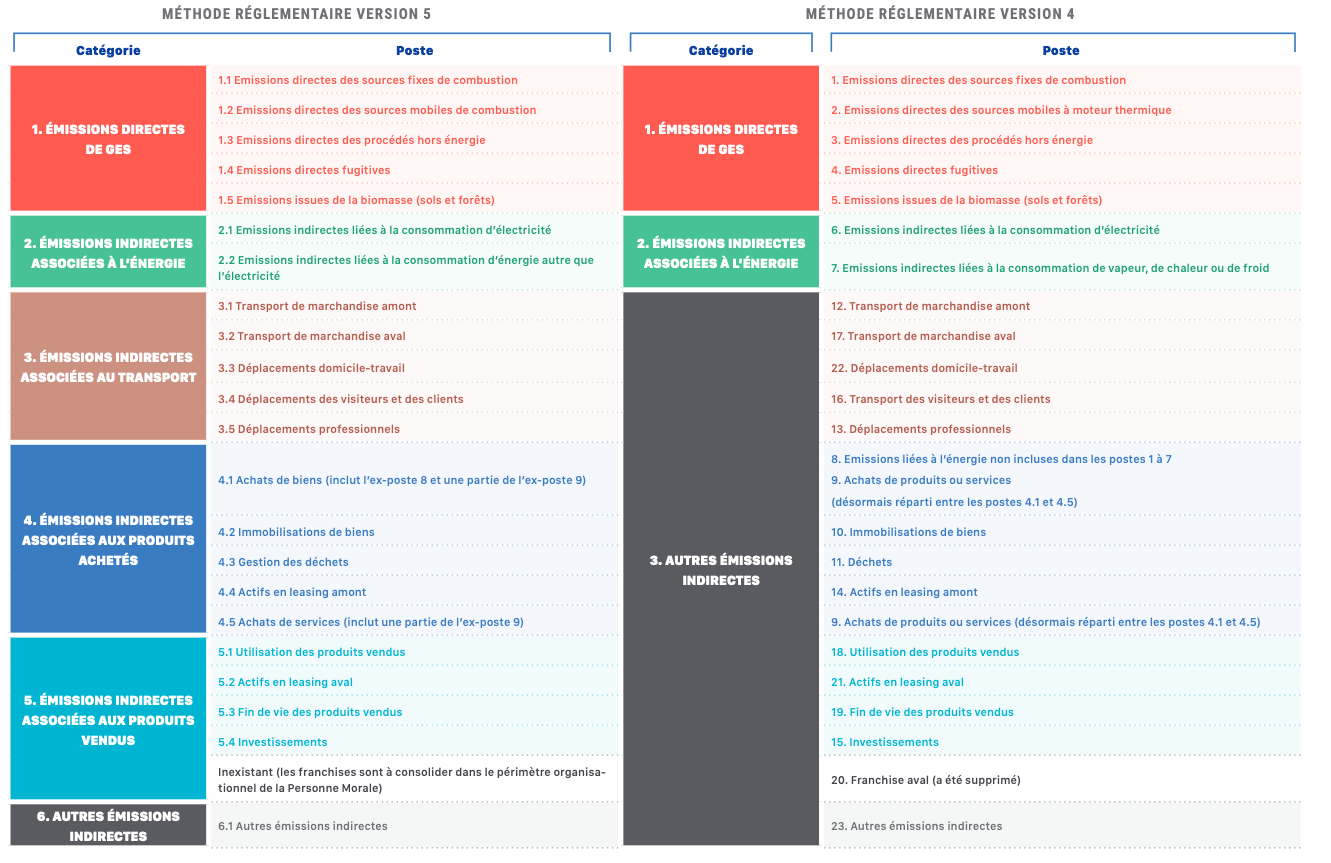